In [1]:
#importar libs
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#upload dp arquivo
from google.colab import files
arq = files.upload()

In [4]:
#nosso DataFrame
df = pd.read_excel("/content/AdventureWorks.xlsx")

In [5]:
df.head() #visualizando as 5 primeiras linhas

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
#quantidade de linhas e coluns
df.shape

(904, 16)

In [7]:
df.dtypes #tipos de dados

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
#Receita total
df["Valor Venda"].sum()

5984606.1426

In [10]:
#custo total
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [11]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [12]:
#custo total?
round(df["custo"].sum(), 2)

2486783.05

In [13]:
#agora podemos achar o lucro total
#criar uma coluna de lucro que será Receita - custo
df["lucro"] = df["Valor Venda"] - df["custo"]

In [14]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [15]:
#total lucro
round(df["lucro"].sum(), 2)

3497823.09

In [17]:
#criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"] 

In [18]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [20]:
#..média do temp de envio para cada MArca, e para isso precisamos transformar a coluna Tempo_envio em númerica
#extrainso apenas os dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [21]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [22]:
#verificando o tipo tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

In [23]:
#media do tempo de envio por marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

**Missing Values**


In [24]:
#verificando se temos dados ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [25]:
#querendo saber o lucro por Ano e por Marca
#agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [26]:
pd.options.display.float_format = '{:20,.2f}'.format

In [28]:
#resetar o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()

In [32]:
#total dos pordutos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

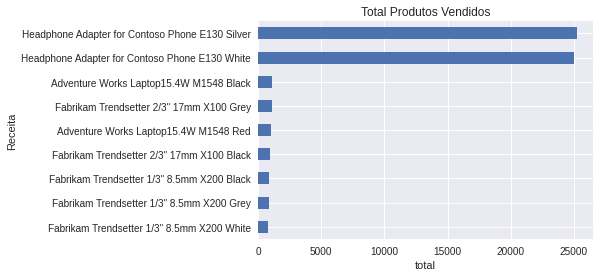

In [33]:
#gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("total")
plt.ylabel("Receita");

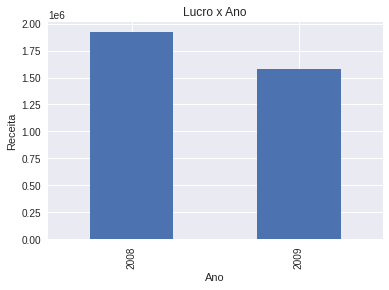

In [34]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [35]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [40]:
#vendas apenas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [41]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

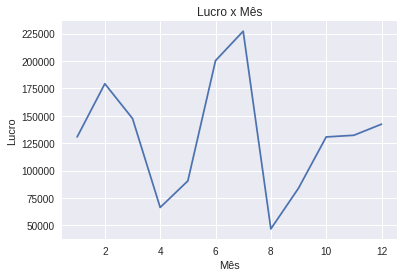

In [47]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

In [ ]:
#por marca ---
df_2009.groupby(df_2009("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [ ]:
df_2009.groupby(df_2009("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [53]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

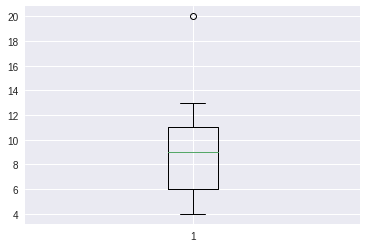

In [54]:
#Gráficos de Boxplot
plt.boxplot(df["Tempo_envio"]); #mostrando o limite ---mediana é o traço --bolinha  é o outlier(20)

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <a list of 10 Patch objects>)

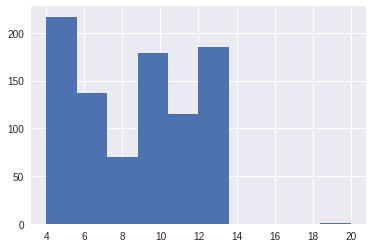

In [55]:
#Histograma
plt.hist(df["Tempo_envio"])

In [56]:
#tempo mínimo de envio
df["Tempo_envio"].min()

4

In [57]:
df["Tempo_envio"].max()

20

In [58]:
#identificando o Outlier
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [59]:
#salvando
df.to_csv("df_vendas.csv", index=False)